 **Introduction**
 
Here I will explore the data presented by "UCI Machine Learning" for mushroom classification. The goal of this dataset is to classify between edible (e) to poisonous (p) mushrooms. First, I will analyze the data, by showing it's characteristics, and then I will classify it to achieve maximum accuracy and precision. 

https://medium.com/@Kavya2099/optimizing-performance-selectkbest-for-efficient-feature-selection-in-machine-learning-3b635905ed48#1cb1

https://www.aporia.com/learn/feature-importance/feature-importance-7-methods-and-a-quick-tutorial/#:~:text=The%20feature%20importance%20is%20calculated,is%20considered%20the%20most%20important.

df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));**Python libraries**

The libraries for this kernel are:

•	[Numpy](http://http://www.numpy.org/)

•	[Pandas](http://pandas.pydata.org/)

•	[Seaborn](https://seaborn.pydata.org/)

•	[Matplotlib](https://matplotlib.org/)

•	[Graphviz](http://www.graphviz.org/)

•	[Scikit-Learn](http://scikit-learn.org/stable/index.html)



Numpy will be used for linear algebra and fixing arrays, Pandas for data processing, Seaborn for cool visualizations, matplotlib for figures, graphviz for awesome graph visualization and Scikit-Learn for preprocessing and machine learning algorithms.

Importing of those libraries:


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

**Loading the data and initial exploration**

In [2]:
df = pd.read_csv('../input/mushrooms.csv')

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.

In [6]:
df=df.drop(["veil-type"],axis=1)

The data is categorial. Categorical data cannot typically be directly handled by machine learning algorithms, as most algorithms are primarily designed to operate with numerical data only. Therefore, before categorical features can be used as inputs to machine learning algorithms, they must be encoded as numerical values.

There are several techniques for encoding categorical features, including one-hot encoding, ordinal encoding, and target encoding. The choice of encoding technique depends on the specific characteristics of the data and the requirements of the machine learning algorithm being used.

**Quick look at the characteristics of the data**

The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification. 

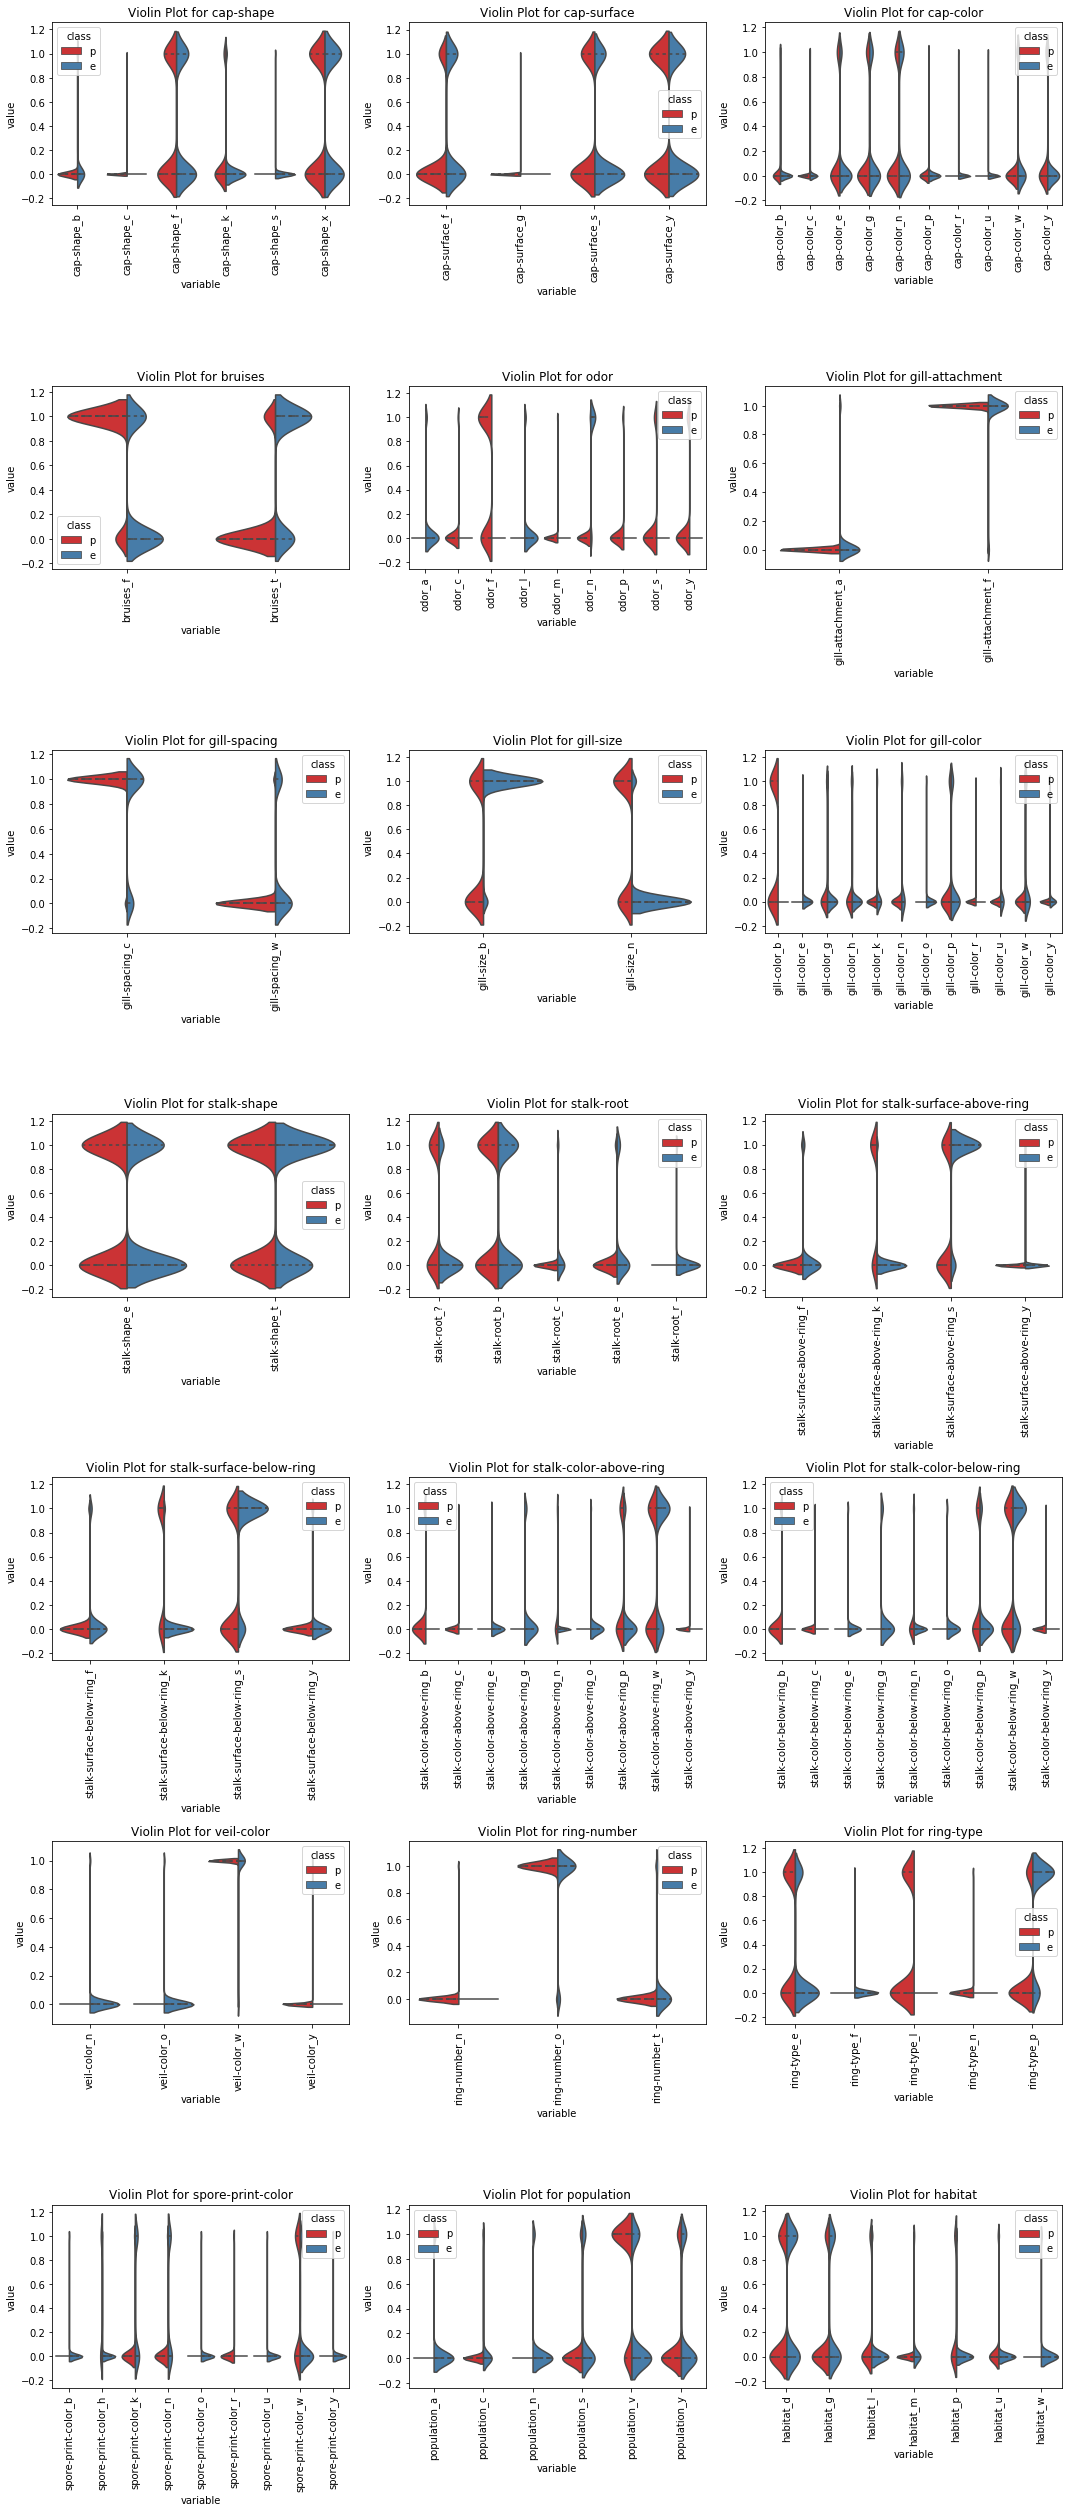

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
target = 'class'

# Get the number of columns (excluding the 'class' column)
num_columns = len(df.columns[df.columns != target])

# Determine the number of rows and columns for the subplot grid
num_rows = (num_columns // 3) + (num_columns % 3)  # Adjust the division factor as needed
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through columns (excluding the 'class' column)
for i, column in enumerate(df.columns[df.columns != target]):
    feature_of_interest = column

    # Use pd.get_dummies to one-hot encode the selected feature
    df_encoded = pd.get_dummies(df[feature_of_interest], prefix=feature_of_interest)

    # Concatenate the one-hot encoded feature with the target column
    df_aggregated = pd.concat([df[target], df_encoded], axis=1)

    # Melt the DataFrame to long format
    df_melted = pd.melt(df_aggregated, id_vars=[target])

    # Create a violin plot for each column in a specific subplot
    sns.violinplot(ax=axes[i], x='variable', y="value", hue=target, split=True, data=df_melted, inner="quartile", palette='Set1')
    
    axes[i].set_title(f'Violin Plot for {column}')
    axes[i].set_xticklabels(df_melted['variable'].unique(), rotation=90)  # Set unique variable labels

# Adjust layout
plt.tight_layout()
plt.show()


**Is the data balanced?**

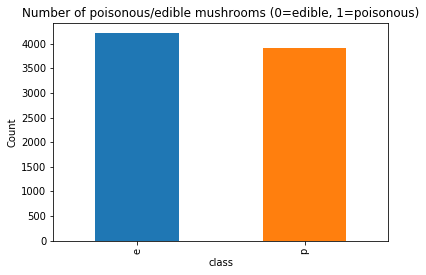

In [8]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

The dataset is balanced

In [9]:
# Apply one-hot encoding to all columns except the target column
df_encoded = pd.get_dummies(df[df.columns[df.columns != 'class']], columns=df.columns[df.columns != 'class'])

# Concatenate with the target column
df_encoded = pd.concat([df['class'], df_encoded], axis=1)

df_encoded['class'] = df_encoded['class'].replace({'p': 0, 'e': 1})

df_encoded

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


Let's look at the correlation between the variables:

# Feature Selection

Feature importance is useful for machine learning tasks because it allows practitioners to understand which features in a dataset are contributing most to the final prediction, and which features are less important. This information can be used in a variety of ways:

* Feature selection: By identifying the most important features, practitioners can select a subset of relevant features for use in building a model, reducing dimensionality and noise in the data, and improving model interpretability.
* Model interpretability: By understanding which features are most important, practitioners can gain insights into the underlying relationships in the data and how the model is making predictions.
* Model debugging: If a model is not performing well, feature importance can be used to identify which features may be causing problems and require further investigation.
* Business decision-making: By understanding which features are most important, practitioners can make more informed decisions about which features to collect and how to allocate resources.
* Improving model performance: By removing less important features, practitioners can improve model performance by reducing overfitting and training time.

## 1. SelectKBest and chi2

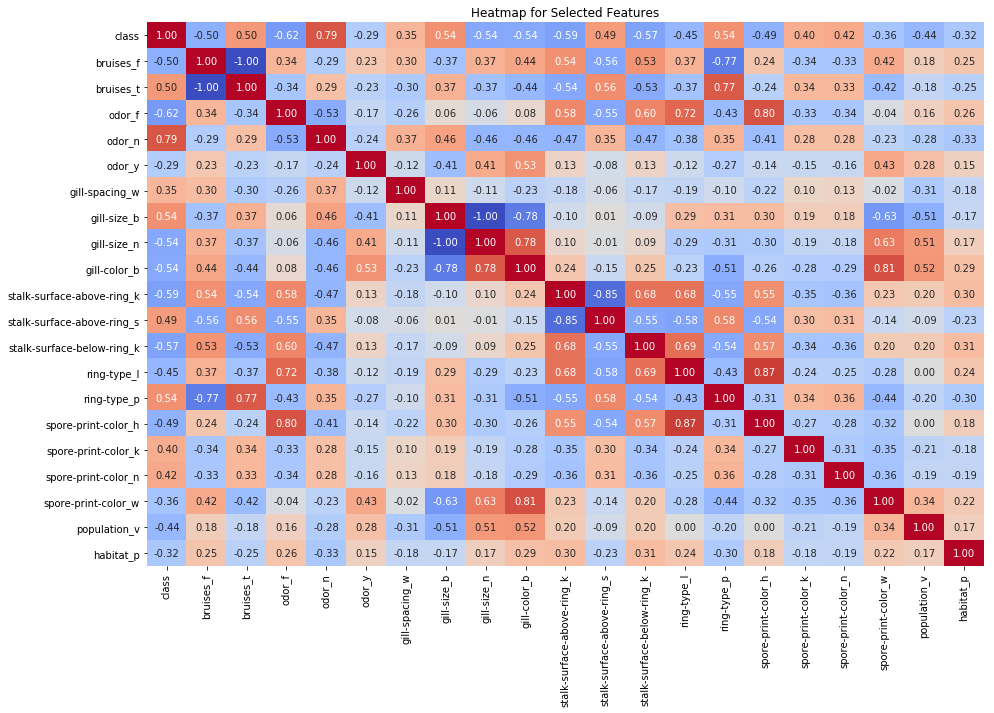

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

# Assuming your target variable is 'class'
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# 1. Feature Selection with SelectKBest and chi2
# Apply feature selection
selector = SelectKBest(score_func=chi2, k=20)  # Adjust the value of k as needed
X_selected = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Create a new DataFrame with selected features and target variable
df_selected = pd.concat([df_encoded['class'], X[selected_features]], axis=1)

# 2. Create a heatmap for selected features
plt.figure(figsize=(15, 10))
sns.heatmap(df_selected.corr(), cmap="coolwarm", annot=True, fmt=".2f", cbar=False)
plt.title('Heatmap for Selected Features')
plt.show()


Most important features:

In [11]:
print(*selected_features, sep = ',')

bruises_f,bruises_t,odor_f,odor_n,odor_y,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,ring-type_l,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_w,population_v,habitat_p


# Dimensionality Reduction

## 1.  PCA

Explained variance ratio: [0.16810879 0.13889755]
Transformed data after PCA:
[[-0.99624515 -0.9468911 ]
 [-1.44173291 -0.16415474]
 [-1.52408484 -0.40874627]
 ...
 [-0.28781666 -0.32621297]
 [ 1.93043306 -1.5731632 ]
 [-0.24929713 -0.31229145]]


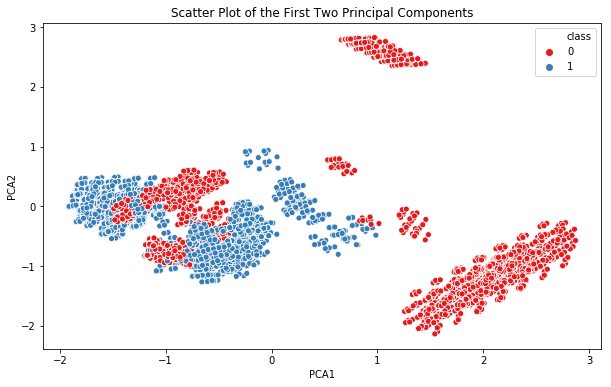

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your target variable is 'class'
X = df_encoded.drop('class', axis=1)

# 2. Dimensionality Reduction with PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the transformed data after dimensionality reduction
print("Transformed data after PCA:")
print(X_pca)

# Create a DataFrame for the transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['class'] = df_encoded['class']

# Create a scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='class', data=df_pca, palette='Set1')
plt.title('Scatter Plot of the First Two Principal Components')
plt.show()


## 2. t-SNE

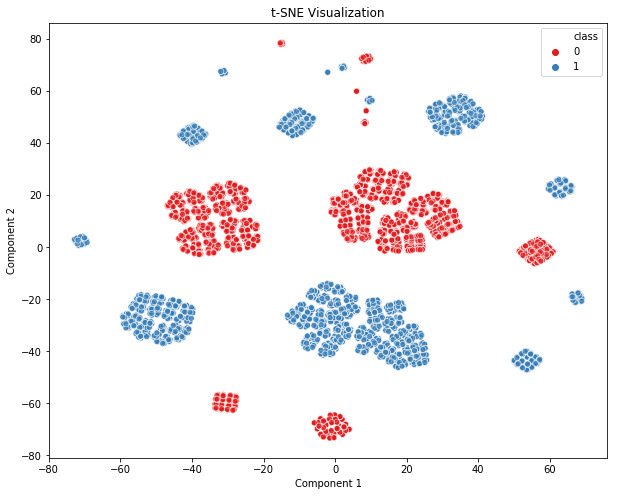

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming your target variable is 'class'
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# 1. Dimensionality Reduction with t-SNE
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the reduced features and target variable
df_tsne = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['class'] = y

# 2. Create a scatter plot for the t-SNE components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='class', data=df_tsne, palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization')
plt.show()


Usually the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely:

**Model, predict and estimate the result:**

In [14]:
# Assuming your target variable is 'class'
X = df_encoded[selected_features]
Y = df_encoded['class']

# Split the data into training (80%) and temporary (20%) sets
X_train_temp, X_test, Y_train_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split the temporary set into training (80%) and validation (20%) sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_temp, Y_train_temp, test_size=0.2, random_state=42)


For the mushroom classification dataset, I chose to use decision tree classifier. I will use the default settings of the classifier and explain shortly how it works.

1. Random Forest:
* Ensemble method based on decision trees.
* Robust, handles non-linear relationships well, and less prone to overfitting.
2. Gradient Boosting (e.g., XGBoost, LightGBM, AdaBoost):
* Builds an ensemble of weak learners sequentially, with each learner correcting errors of the previous ones.
* Generally provides high predictive accuracy.
3. Support Vector Machines (SVM):
* Effective for both linear and non-linear relationships.
* Good for high-dimensional spaces, and kernel functions can handle complex data.
4. Logistic Regression:
* Simple and interpretable.
* Suitable for linear relationships and can be a good baseline model.
5. K-Nearest Neighbors (KNN):
* Non-parametric and instance-based, makes predictions based on the majority class of its k-nearest neighbors.
* Can capture local patterns in the data.
6. Neural Networks (Deep Learning):
* Random Forest:Deep learning models, such as Multilayer Perceptrons (MLPs) or Convolutional Neural Networks (CNNs), can capture complex patterns in large datasets.
* Requires more data and computational resources.

## Random Forest:

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 7)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the validation set
Y_val_pred = rf_classifier.predict(X_val)

# Evaluate the accuracy of the model on the validation set
accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")

# Make predictions on the test set
Y_test_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Validation Accuracy: 99.00%
Test Accuracy: 99.14%


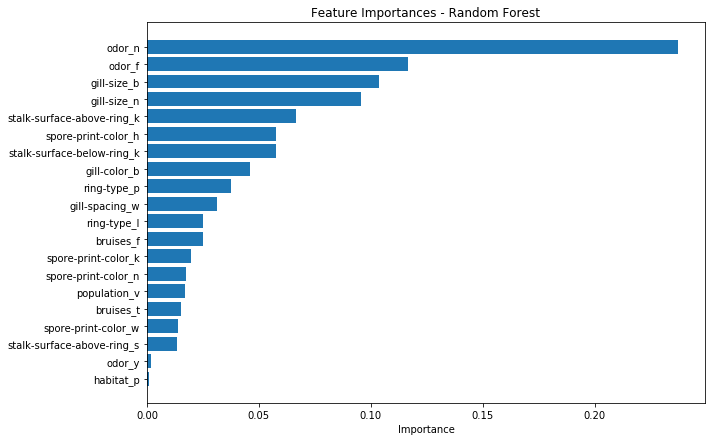

In [16]:
features_list = X.columns.values
feature_importance = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances - Random Forest')
plt.show()


### catboost

0:	learn: 0.2111260	test: 0.2266789	best: 0.2266789 (0)	total: 65.7ms	remaining: 1.25s
1:	learn: 0.1017526	test: 0.1198071	best: 0.1198071 (1)	total: 78.3ms	remaining: 704ms
2:	learn: 0.0927414	test: 0.1097782	best: 0.1097782 (2)	total: 91.2ms	remaining: 517ms
3:	learn: 0.0833006	test: 0.1022094	best: 0.1022094 (3)	total: 108ms	remaining: 433ms
4:	learn: 0.0742030	test: 0.0898552	best: 0.0898552 (4)	total: 121ms	remaining: 363ms
5:	learn: 0.0642929	test: 0.0774741	best: 0.0774741 (5)	total: 133ms	remaining: 311ms
6:	learn: 0.0592965	test: 0.0729771	best: 0.0729771 (6)	total: 146ms	remaining: 270ms
7:	learn: 0.0572393	test: 0.0714117	best: 0.0714117 (7)	total: 159ms	remaining: 238ms
8:	learn: 0.0527106	test: 0.0653991	best: 0.0653991 (8)	total: 171ms	remaining: 209ms
9:	learn: 0.0460765	test: 0.0562355	best: 0.0562355 (9)	total: 184ms	remaining: 184ms
10:	learn: 0.0452491	test: 0.0554741	best: 0.0554741 (10)	total: 196ms	remaining: 160ms
11:	learn: 0.0440967	test: 0.0549740	best: 0.0549

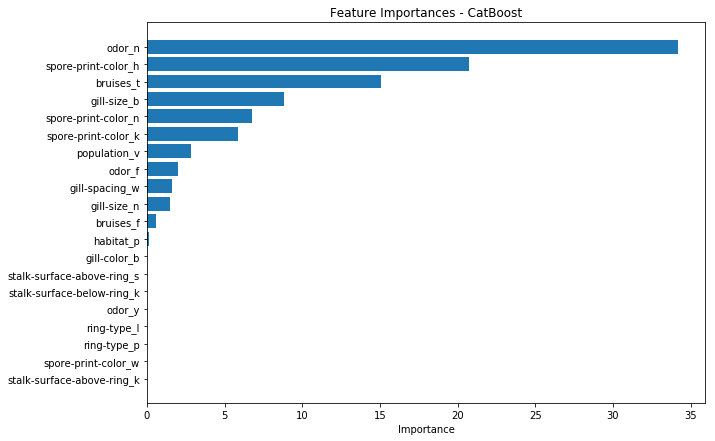

In [17]:
from catboost import CatBoostClassifier

# Create a CatBoost classifier
cat_classifier = CatBoostClassifier(iterations=20, depth=2, random_state=42)

# Train the classifier on the training data
cat_classifier.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=10)

# Make predictions on the validation set
Y_val_pred = cat_classifier.predict(X_val)

# Evaluate the accuracy of the model on the validation set
accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")

# Make predictions on the test set
Y_test_pred = cat_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Get feature importances
feature_importance = cat_classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plot feature importances
plt.figure(figsize=(10, 7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances - CatBoost')
plt.show()

Validation Accuracy: 97.08%
Test Accuracy: 97.35%


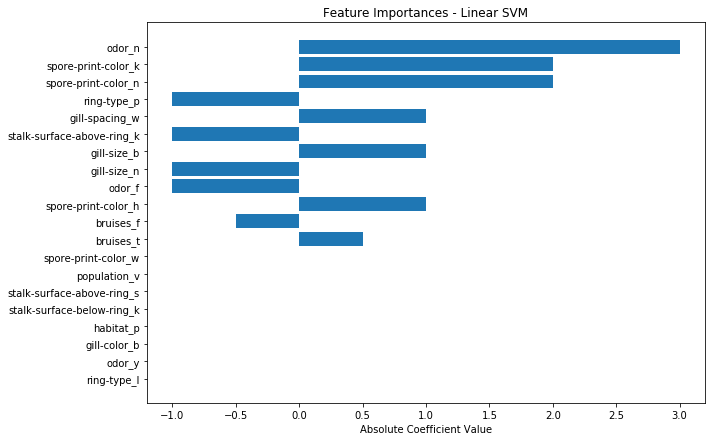

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the validation set
Y_val_pred = svm_classifier.predict(X_val)

# Evaluate the accuracy of the model on the validation set
accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")

# Make predictions on the test set
Y_test_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Access coefficients for linear SVM
coefficients = svm_classifier.coef_.flatten()

# Sort coefficients by absolute values in descending order
sorted_idx = np.argsort(np.abs(coefficients))
sorted_coefficients = coefficients[sorted_idx]
sorted_columns = X.columns[sorted_idx]

# Plot feature importances for linear SVM
plt.figure(figsize=(10, 7))
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_coefficients)), sorted_columns)
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importances - Linear SVM')
plt.show()

**Decision tree classifier**


Classification tree predict a qualative response, in contrast to regression tree that predict quantitive response. Classification tree predicts the observation that belong to the most common occurring class from the training data for each region. In order to grow the classification tree the algorithm uses recursive binary splitting. 


The Gini index

The Gini index is a measure of inequality of a system that has values between 0 to 1 (while 0 is perfect equality and 1 is absolute inequality). In other words the Gini index is a measure that define the node purity (value of 0 is pure and value of 1 is not pure).

The Gini index is defined by:
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2xshC_PkgPeHxdBPNtyo1PlRuXrCdi7P7amZuKZQyKYs9P5ztyQ)

while J is the classes, pi is the fraction of items labeled with class i in the set.

In [19]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, Y_train)

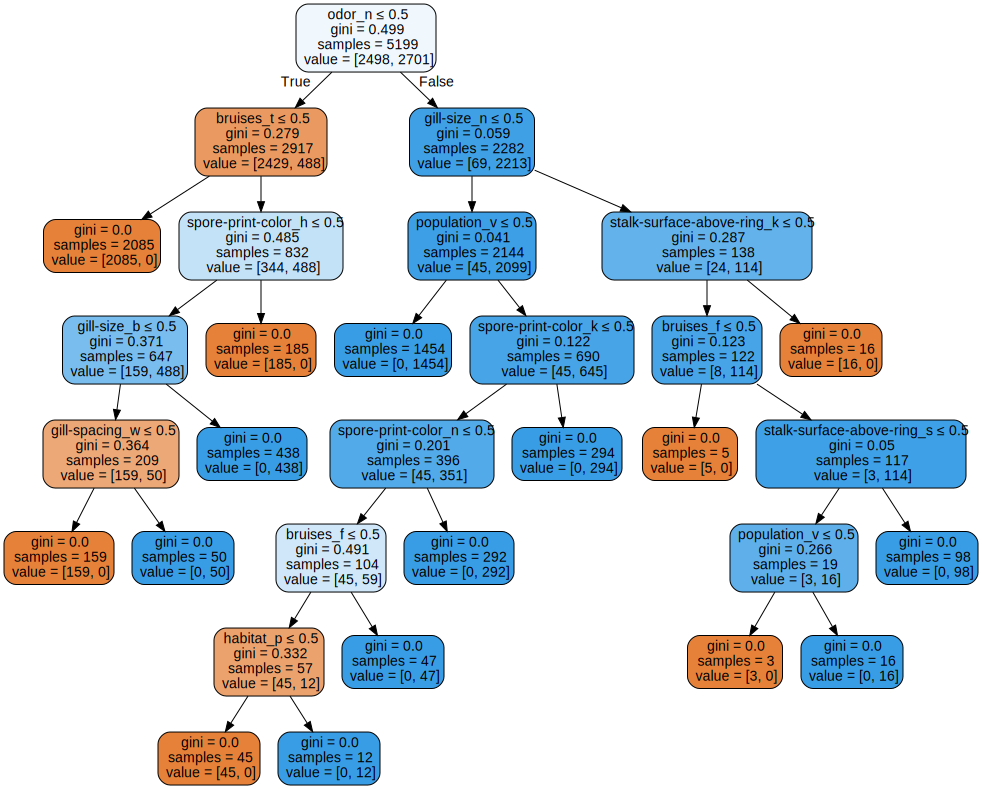

In [20]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

as we see from the heatmap there a lot of correlations between featerues with coefficient close to 0.5, so here is the same situation on graph

**Feature importances**

By all methods examined before the feature that is most important is "gill-color".

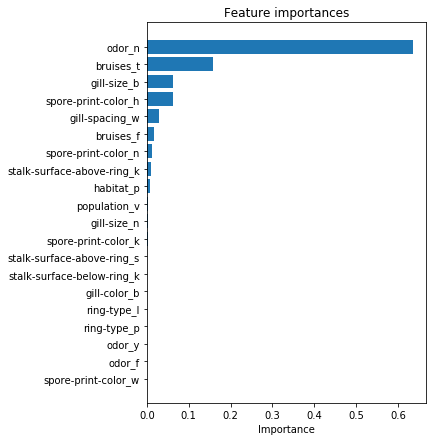

In [21]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [22]:
y_pred=clf.predict(X_test)

In [23]:
print("Decision Tree Classifier report \n", classification_report(Y_test, y_pred))

Decision Tree Classifier report 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       782
          1       1.00      1.00      1.00       843

avg / total       1.00      1.00      1.00      1625



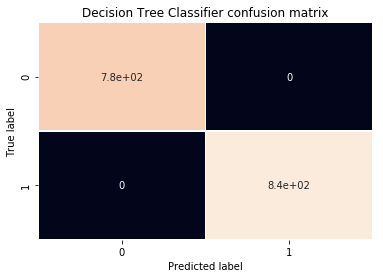

In [24]:
cfm=confusion_matrix(Y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

**Decision Tree Classifier resulted 100% accuracy and precision!! That's clearly overfitting! :...(**

In the code below 10-fold cross validation is performed for different depths of the tree and the accuracy is computed. The accuracy on the test set seems to plateau when the depth is 10.

Lets see at which tree depth the model begins to overfit:

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(0, 20)

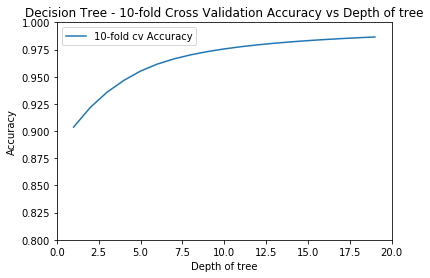

In [25]:
#code edited but taken from: https://www.r-bloggers.com/practical-machine-learning-with-r-and-python-part-5/
from sklearn.cross_validation import KFold
def computeCVAccuracy(X,y,folds):
    accuracy=[]
    foldAcc=[]
    depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    for i in depth: 
        kf = KFold(len(X),n_folds=folds)
        for train_index, test_index in kf:
            X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)
            clf = DecisionTreeClassifier(max_depth = i).fit(X_train, Y_train)
            score=clf.score(X_test, Y_test)
            accuracy.append(score)     
        foldAcc.append(np.mean(accuracy))  
    return(foldAcc)
    
    
cvAccuracy=computeCVAccuracy(X,Y,folds=10)

df1=pd.DataFrame(cvAccuracy)
df1.columns=['10-fold cv Accuracy']
df=df1.reindex(range(1,20))
df.plot()
plt.title("Decision Tree - 10-fold Cross Validation Accuracy vs Depth of tree")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.ylim([0.8,1])
plt.xlim([0,20])

**Gaussian Naive Bayes (GaussianNB)**

In [26]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

In [27]:
y_pred_GNB=clf_GNB.predict(X_test)

In [28]:
cfm=confusion_matrix(Y_test, y_pred_GNB)

Text(0.5,15,'Predicted label')

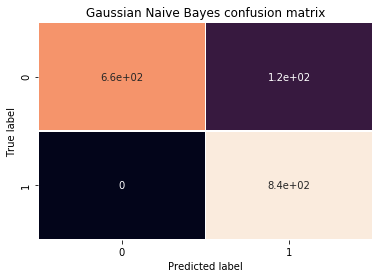

In [29]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [30]:
print("Test data- Gaussian Naive Bayes report \n", classification_report(Y_test, y_pred_GNB))

Test data- Gaussian Naive Bayes report 
              precision    recall  f1-score   support

          0       1.00      0.84      0.91       782
          1       0.87      1.00      0.93       843

avg / total       0.93      0.92      0.92      1625



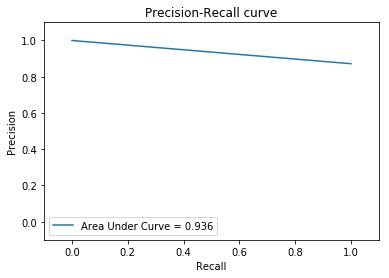

In [31]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_GNB)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

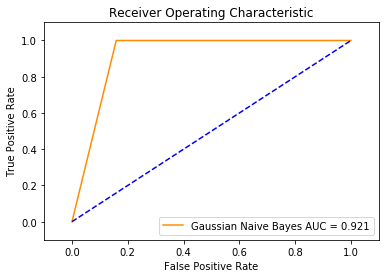

In [32]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(Y_test, y_pred_GNB, "Gaussian Naive Bayes")